In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/2D_sperm_hyper_data/spermtrackingdata/HTF_sperm_8.csv')

In [ ]:
df

,Position X,Position Y,Time,TrackID,Count
0,1163.510,1328.07,917,1000035230,144
1,1150.140,1323.97,918,1000035230,144
2,1150.150,1307.53,919,1000035230,144
3,1153.230,1302.39,920,1000035230,144
4,1145.010,1295.20,921,1000035230,144
...,...,...,...,...,...
139,207.887,1215.40,1056,1000035230,144
140,209.961,1232.88,1057,1000035230,144
141,202.763,1235.96,1058,1000035230,144
142,197.621,1238.02,1059,1000035230,144


In [ ]:
df

,Position X,Position Y,Time,TrackID,Count
0,1163.510,1328.07,917,1000035230,144
1,1150.140,1323.97,918,1000035230,144
2,1150.150,1307.53,919,1000035230,144
3,1153.230,1302.39,920,1000035230,144
4,1145.010,1295.20,921,1000035230,144
...,...,...,...,...,...
139,207.887,1215.40,1056,1000035230,144
140,209.961,1232.88,1057,1000035230,144
141,202.763,1235.96,1058,1000035230,144
142,197.621,1238.02,1059,1000035230,144


In [ ]:
df=df[100:110]

In [ ]:
df['AveragePx'],df['AveragePy']=df['Position X'].rolling(3,center=True).mean(),df['Position Y'].rolling(3,center=True).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.loc[100,['AveragePx','AveragePy']]=df['Position X'][100],df['Position Y'][100]
df.loc[109,['AveragePx','AveragePy']]=df['Position X'][109],df['Position Y'][109]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [ ]:
df

,Position X,Position Y,Time,TrackID,Count,AveragePx,AveragePy
100,454.686,1065.20,1017,1000035230,144,454.686000,1065.200000
101,452.625,1060.06,1018,1000035230,144,447.825000,1062.463333
102,436.164,1062.13,1019,1000035230,144,437.876333,1058.696667
103,424.840,1053.90,1020,1000035230,144,425.187333,1060.073333
104,414.558,1064.19,1021,1000035230,144,416.273000,1064.530000
105,409.421,1075.50,1022,1000035230,144,411.134000,1072.760000
106,409.423,1078.59,1023,1000035230,144,407.705667,1074.820000
107,404.273,1070.37,1024,1000035230,144,399.815667,1072.766667
108,385.751,1069.34,1025,1000035230,144,389.523333,1068.313333
109,378.546,1065.23,1026,1000035230,144,378.546000,1065.230000


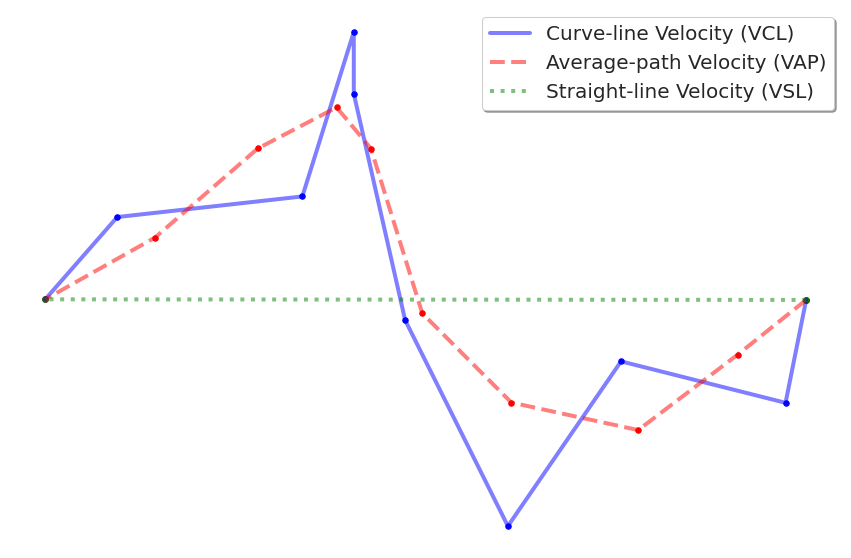

In [ ]:
sns.set_style('white')
fig = plt.figure(figsize=(15,10))
bline=plt.plot(df['Position X'],df['Position Y'],linewidth=4,c='b',alpha=0.5,label='Curve-line Velocity (VCL)')
bdot=plt.scatter(df['Position X'],df['Position Y'],s=30,c='b')
rline=plt.plot(df['AveragePx'],df['AveragePy'],linewidth=4,c='r',alpha=0.5,ls='--',label='Average-path Velocity (VAP)')
rdot=plt.scatter(df['AveragePx'],df['AveragePy'],s=30,c='r')
gline=plt.plot((df['Position X'][100],df['Position X'][109]),(df['Position Y'][100],df['Position Y'][109]),linewidth=4,c='g',alpha=0.5,ls=':',label='Straight-line Velocity (VSL)')
gdot=plt.scatter((df['Position X'][100],df['Position X'][109]),(df['Position Y'][100],df['Position Y'][109]),s=30,c='g')
plt.legend(loc='upper right', shadow=True, fontsize=20)
plt.axis('off')
plt.savefig('/content/drive/MyDrive/2D_sperm_hyper_data/Kinematic_para_instr',bbox_inches='tight',dpi=300)
plt.show()